# Importing necessary libraries

In [1]:
import tensorflow as tf
from keras.datasets import cifar10

# Loading the train and test data from CIFAR-10 dataset

In [2]:
(X_train,y_train), (X_test,y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:
y_test.shape

(10000, 1)

In [7]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

# Visualizing random images from the train dataset

In [8]:
disp_ind = []
for i in range(9):
  disp_ind.append(np.random.randint(0, X_train.shape[0]))

disp_ind

[29316, 1977, 28526, 33770, 47920, 6042, 31850, 12940, 22924]

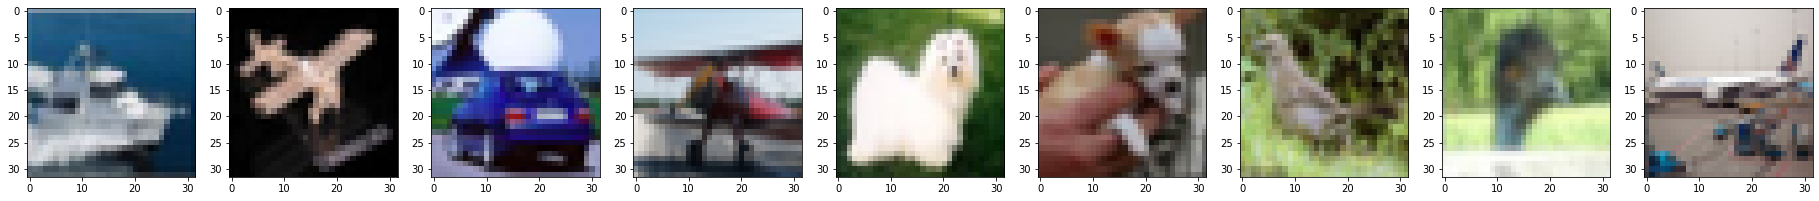

In [9]:
fig,ax = plt.subplots(1,9,figsize=(32,32))
for i in range(len(disp_ind)):
  ax[i].imshow(X_train[disp_ind[i]])

In [10]:
from tensorflow.keras.utils import to_categorical

# One hot Encoding for output labels

In [11]:
y_train_ohe = to_categorical(y_train)
print(y_train_ohe.shape)
y_test_ohe = to_categorical(y_test)
print(y_test_ohe.shape)

(50000, 10)
(10000, 10)


# Scaling the pixel values of train and test images

In [12]:
X_train_flt = X_train.astype(float)
X_test_flt = X_test.astype(float)

X_train_norm = X_train_flt/255
X_test_norm = X_test_flt/255

print(X_train_norm.shape)
print(X_test_norm.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [13]:
from keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Flatten,MaxPooling2D,Dropout,BatchNormalization
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Building a CNN Model with 1 VGG block and trained on train dataset

In [ ]:
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),padding="same",activation='relu',kernel_initializer='glorot_normal',input_shape=(32,32,3)))
model.add(Conv2D(filters=32,kernel_size=(3,3),padding="same",activation='relu',kernel_initializer='glorot_normal'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=512,activation='relu',kernel_initializer='glorot_normal'))
model.add(Dense(units=128,activation='relu',kernel_initializer='glorot_normal'))
model.add(Dense(units=10,activation='softmax'))
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(x=X_train_norm,y=y_train_ohe,batch_size=32,epochs=20,validation_data=(X_test_norm,y_test_ohe))

Epoch 1/20
1563/1563 [==============================] - 17s 10ms/step - loss: 1.2869 - accuracy: 0.5383 - val_loss: 1.0013 - val_accuracy: 0.6498
Epoch 2/20
1563/1563 [==============================] - 15s 9ms/step - loss: 0.8840 - accuracy: 0.6882 - val_loss: 0.9045 - val_accuracy: 0.6845
Epoch 3/20
1563/1563 [==============================] - 15s 9ms/step - loss: 0.6574 - accuracy: 0.7682 - val_loss: 0.8879 - val_accuracy: 0.7020
Epoch 4/20
1563/1563 [==============================] - 15s 9ms/step - loss: 0.4475 - accuracy: 0.8424 - val_loss: 0.9784 - val_accuracy: 0.6966
Epoch 5/20
1563/1563 [==============================] - 15s 9ms/step - loss: 0.2714 - accuracy: 0.9051 - val_loss: 1.1832 - val_accuracy: 0.6889
Epoch 6/20
1563/1563 [==============================] - 15s 9ms/step - loss: 0.1710 - accuracy: 0.9413 - val_loss: 1.3649 - val_accuracy: 0.6879
Epoch 7/20
1563/1563 [==============================] - 15s 9ms/step - loss: 0.1102 - accuracy: 0.9616 - val_loss: 1.6059 - val_a

# Plotting the performance metrics

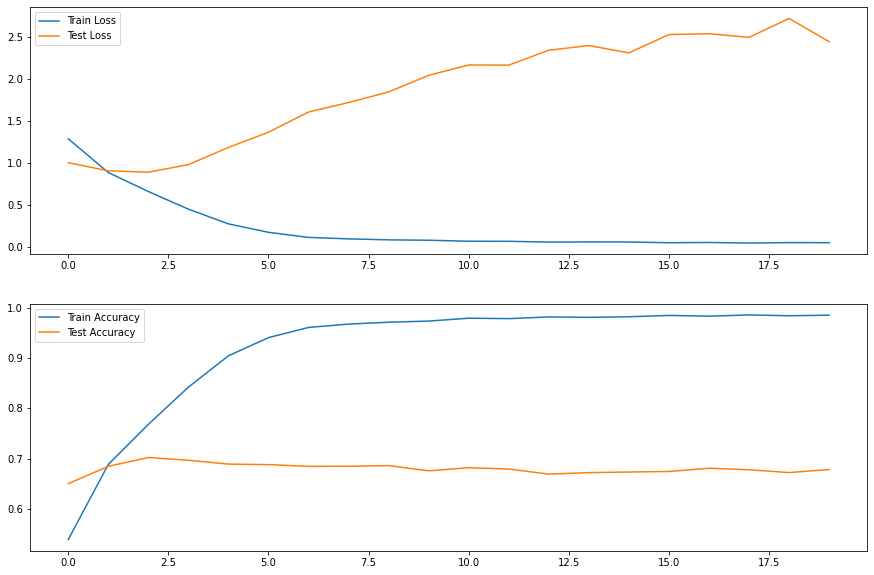

In [ ]:
fig,ax=plt.subplots(2,figsize=(15,10))
ax[0].plot(history.history['loss'],label='Train Loss')
ax[0].plot(history.history['val_loss'],label='Test Loss')
ax[0].legend()
ax[1].plot(history.history['accuracy'],label='Train Accuracy')
ax[1].plot(history.history['val_accuracy'],label='Test Accuracy')
ax[1].legend()

# Evaluating the CNN model on test dataset

313/313 [==============================] - 2s 5ms/step - loss: 2.4447 - accuracy: 0.6781


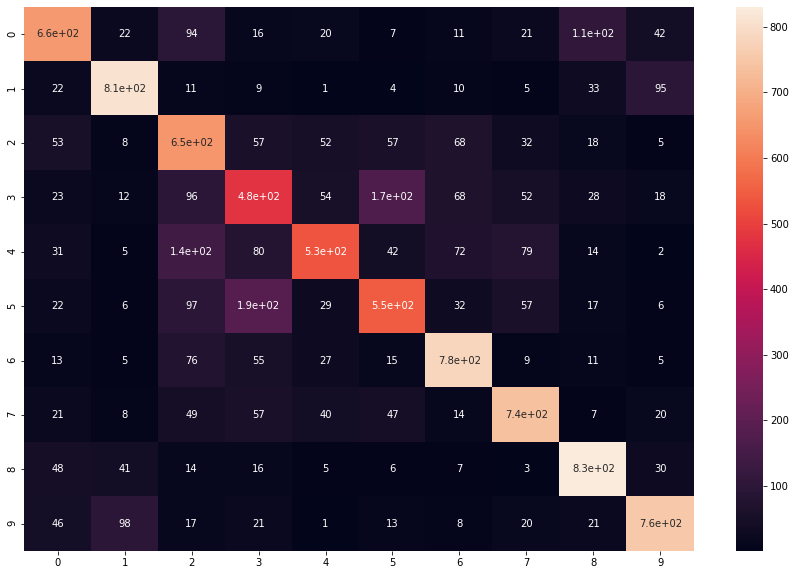

In [ ]:
evaluation = model.evaluate(x=X_test_norm,y=y_test_ohe,batch_size=32)
y_test_pred = model.predict(X_test_norm)
y_test_pred = np.argmax(y_test_pred,axis=1)
cm = confusion_matrix(y_test,y_test_pred)
plt.figure(figsize=(15,10))
sns.heatmap(cm,annot=True)

# Building a CNN Model with 2 VGG blocks and trained on train dataset

In [ ]:
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),padding="same",activation='relu',kernel_initializer='glorot_normal',input_shape=(32,32,3)))
model.add(Conv2D(filters=32,kernel_size=(3,3),padding="same",activation='relu',kernel_initializer='glorot_normal'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same",activation='relu',kernel_initializer='glorot_normal'))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same",activation='relu',kernel_initializer='glorot_normal'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=512,activation='relu',kernel_initializer='glorot_normal'))
model.add(Dense(units=128,activation='relu',kernel_initializer='glorot_normal'))
model.add(Dense(units=10,activation='softmax'))
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(x=X_train_norm,y=y_train_ohe,batch_size=32,epochs=20,validation_data=(X_test_norm,y_test_ohe))

Epoch 1/20
1563/1563 [==============================] - 20s 12ms/step - loss: 1.3365 - accuracy: 0.5146 - val_loss: 1.0435 - val_accuracy: 0.6313
Epoch 2/20
1563/1563 [==============================] - 20s 13ms/step - loss: 0.8742 - accuracy: 0.6898 - val_loss: 0.8060 - val_accuracy: 0.7231
Epoch 3/20
1563/1563 [==============================] - 20s 13ms/step - loss: 0.6644 - accuracy: 0.7675 - val_loss: 0.7925 - val_accuracy: 0.7324
Epoch 4/20
1563/1563 [==============================] - 20s 13ms/step - loss: 0.4985 - accuracy: 0.8249 - val_loss: 0.7972 - val_accuracy: 0.7397
Epoch 5/20
1563/1563 [==============================] - 20s 13ms/step - loss: 0.3487 - accuracy: 0.8762 - val_loss: 0.8677 - val_accuracy: 0.7456
Epoch 6/20
1563/1563 [==============================] - 19s 12ms/step - loss: 0.2387 - accuracy: 0.9172 - val_loss: 1.0044 - val_accuracy: 0.7369
Epoch 7/20
1563/1563 [==============================] - 19s 12ms/step - loss: 0.1796 - accuracy: 0.9371 - val_loss: 1.1612 -

# Plotting the performance metrics

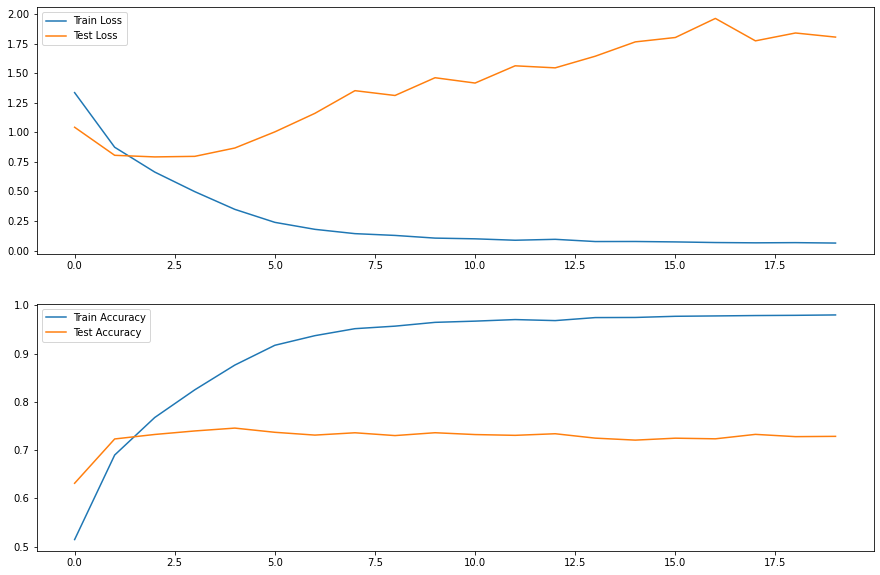

In [ ]:
fig,ax=plt.subplots(2,figsize=(15,10))
ax[0].plot(history.history['loss'],label='Train Loss')
ax[0].plot(history.history['val_loss'],label='Test Loss')
ax[0].legend()
ax[1].plot(history.history['accuracy'],label='Train Accuracy')
ax[1].plot(history.history['val_accuracy'],label='Test Accuracy')
ax[1].legend()

# Evaluating the model on test dataset

313/313 [==============================] - 2s 6ms/step - loss: 1.8064 - accuracy: 0.7285


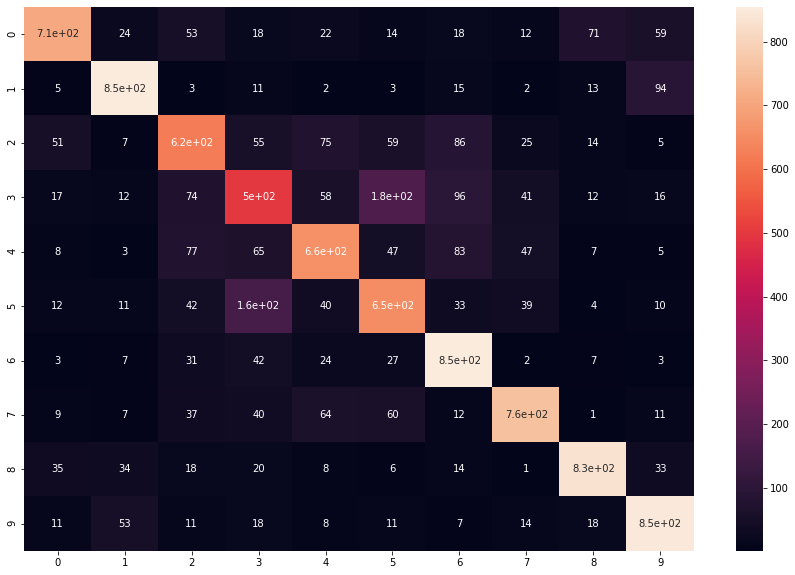

In [ ]:
evaluation = model.evaluate(x=X_test_norm,y=y_test_ohe,batch_size=32)
y_test_pred = model.predict(X_test_norm)
y_test_pred = np.argmax(y_test_pred,axis=1)
cm = confusion_matrix(y_test,y_test_pred)
plt.figure(figsize=(15,10))
sns.heatmap(cm,annot=True)

# Building a CNN model with 3 VGG blocks and trained on train dataset

In [ ]:
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),padding="same",activation='relu',kernel_initializer='glorot_normal',input_shape=(32,32,3)))
model.add(Conv2D(filters=32,kernel_size=(3,3),padding="same",activation='relu',kernel_initializer='glorot_normal'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same",activation='relu',kernel_initializer='glorot_normal'))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same",activation='relu',kernel_initializer='glorot_normal'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=128,kernel_size=(3,3),padding="same",activation='relu',kernel_initializer='glorot_normal'))
model.add(Conv2D(filters=128,kernel_size=(3,3),padding="same",activation='relu',kernel_initializer='glorot_normal'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=512,activation='relu',kernel_initializer='glorot_normal'))
model.add(Dense(units=128,activation='relu',kernel_initializer='glorot_normal'))
model.add(Dense(units=10,activation='softmax'))
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(x=X_train_norm,y=y_train_ohe,batch_size=32,epochs=20,validation_data=(X_test_norm,y_test_ohe))

Epoch 1/20
1563/1563 [==============================] - 26s 16ms/step - loss: 1.5289 - accuracy: 0.4349 - val_loss: 1.1527 - val_accuracy: 0.5890
Epoch 2/20
1563/1563 [==============================] - 24s 15ms/step - loss: 1.0234 - accuracy: 0.6358 - val_loss: 0.9540 - val_accuracy: 0.6574
Epoch 3/20
1563/1563 [==============================] - 24s 15ms/step - loss: 0.8298 - accuracy: 0.7077 - val_loss: 0.8669 - val_accuracy: 0.6948
Epoch 4/20
1563/1563 [==============================] - 24s 16ms/step - loss: 0.6963 - accuracy: 0.7544 - val_loss: 0.8543 - val_accuracy: 0.7149
Epoch 5/20
1563/1563 [==============================] - 24s 15ms/step - loss: 0.5883 - accuracy: 0.7924 - val_loss: 0.8362 - val_accuracy: 0.7230
Epoch 6/20
1563/1563 [==============================] - 24s 16ms/step - loss: 0.4966 - accuracy: 0.8263 - val_loss: 0.8590 - val_accuracy: 0.7271
Epoch 7/20
1563/1563 [==============================] - 24s 15ms/step - loss: 0.4192 - accuracy: 0.8520 - val_loss: 0.8236 -

# Plotting the performance metrics 

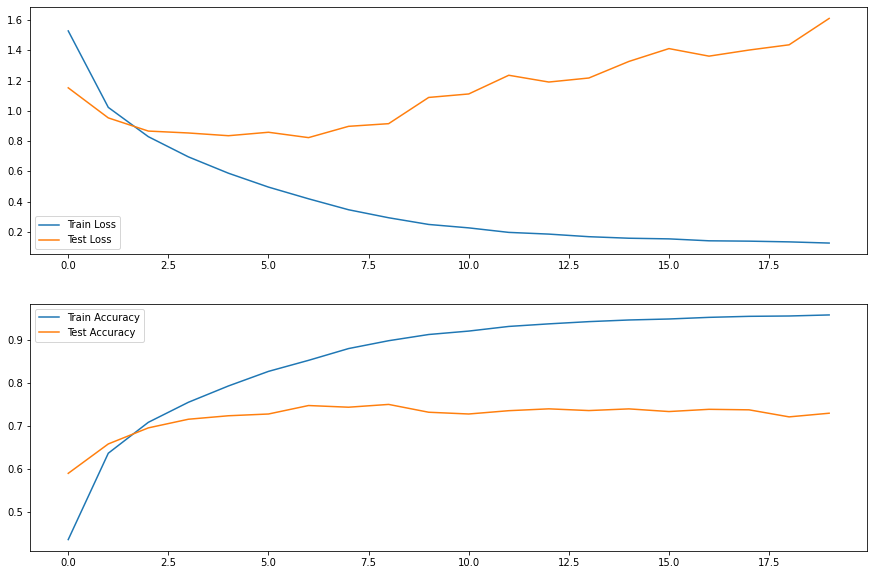

In [ ]:
fig,ax=plt.subplots(2,figsize=(15,10))
ax[0].plot(history.history['loss'],label='Train Loss')
ax[0].plot(history.history['val_loss'],label='Test Loss')
ax[0].legend()
ax[1].plot(history.history['accuracy'],label='Train Accuracy')
ax[1].plot(history.history['val_accuracy'],label='Test Accuracy')
ax[1].legend()

# Evaluating the model on test dataset

313/313 [==============================] - 2s 6ms/step - loss: 1.6114 - accuracy: 0.7289


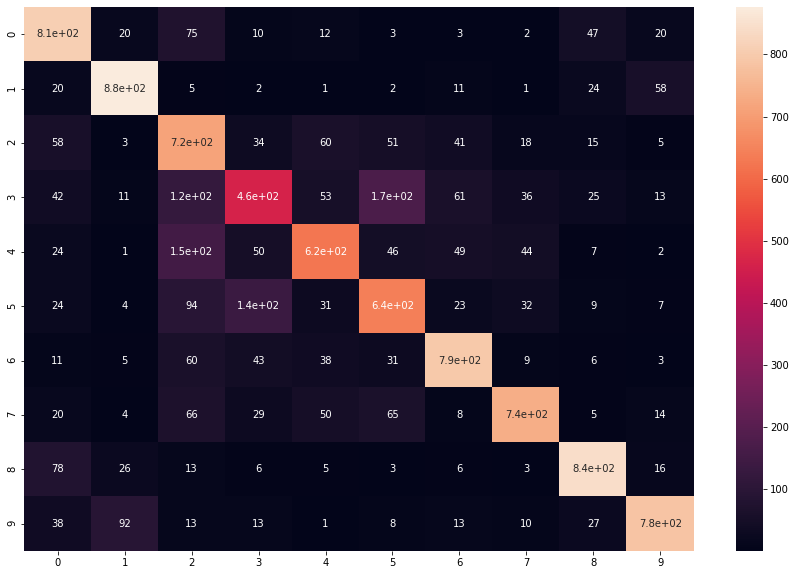

In [ ]:
evaluation = model.evaluate(x=X_test_norm,y=y_test_ohe,batch_size=32)
y_test_pred = model.predict(X_test_norm)
y_test_pred = np.argmax(y_test_pred,axis=1)
cm = confusion_matrix(y_test,y_test_pred)
plt.figure(figsize=(15,10))
sns.heatmap(cm,annot=True)

Finally, obtained better performance using CNN with 3 VGG blocks. So, same architecture is used for further analysis. Also observed overfitting by the model on test dataset. Hence applied various regularization techniques in further analysis

# Adding a dropout layer with dropout of 0.2 and trained on train dataset

In [ ]:
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),padding="same",activation='relu',kernel_initializer='glorot_normal',input_shape=(32,32,3)))
model.add(Conv2D(filters=32,kernel_size=(3,3),padding="same",activation='relu',kernel_initializer='glorot_normal'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add((Dropout(0.2)))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same",activation='relu',kernel_initializer='glorot_normal'))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same",activation='relu',kernel_initializer='glorot_normal'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add((Dropout(0.2)))
model.add(Conv2D(filters=128,kernel_size=(3,3),padding="same",activation='relu',kernel_initializer='glorot_normal'))
model.add(Conv2D(filters=128,kernel_size=(3,3),padding="same",activation='relu',kernel_initializer='glorot_normal'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add((Dropout(0.2)))
model.add(Flatten())
model.add(Dense(units=512,activation='relu',kernel_initializer='glorot_normal'))
model.add((Dropout(0.2)))
model.add(Dense(units=128,activation='relu',kernel_initializer='glorot_normal'))
model.add((Dropout(0.2)))
model.add(Dense(units=10,activation='softmax'))
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(x=X_train_norm,y=y_train_ohe,batch_size=32,epochs=50,validation_data=(X_test_norm,y_test_ohe))

Epoch 1/50
1563/1563 [==============================] - 61s 20ms/step - loss: 1.6608 - accuracy: 0.3852 - val_loss: 1.2655 - val_accuracy: 0.5328
Epoch 2/50
1563/1563 [==============================] - 28s 18ms/step - loss: 1.2107 - accuracy: 0.5678 - val_loss: 1.0691 - val_accuracy: 0.6187
Epoch 3/50
1563/1563 [==============================] - 28s 18ms/step - loss: 1.0409 - accuracy: 0.6362 - val_loss: 0.9318 - val_accuracy: 0.6741
Epoch 4/50
1563/1563 [==============================] - 27s 18ms/step - loss: 0.9353 - accuracy: 0.6727 - val_loss: 0.8331 - val_accuracy: 0.7090
Epoch 5/50
1563/1563 [==============================] - 27s 18ms/step - loss: 0.8481 - accuracy: 0.7024 - val_loss: 0.8973 - val_accuracy: 0.6890
Epoch 6/50
1563/1563 [==============================] - 27s 18ms/step - loss: 0.7918 - accuracy: 0.7254 - val_loss: 0.8249 - val_accuracy: 0.7205
Epoch 7/50
1563/1563 [==============================] - 27s 18ms/step - loss: 0.7534 - accuracy: 0.7385 - val_loss: 0.7663 -

# Plotting the performance metrics

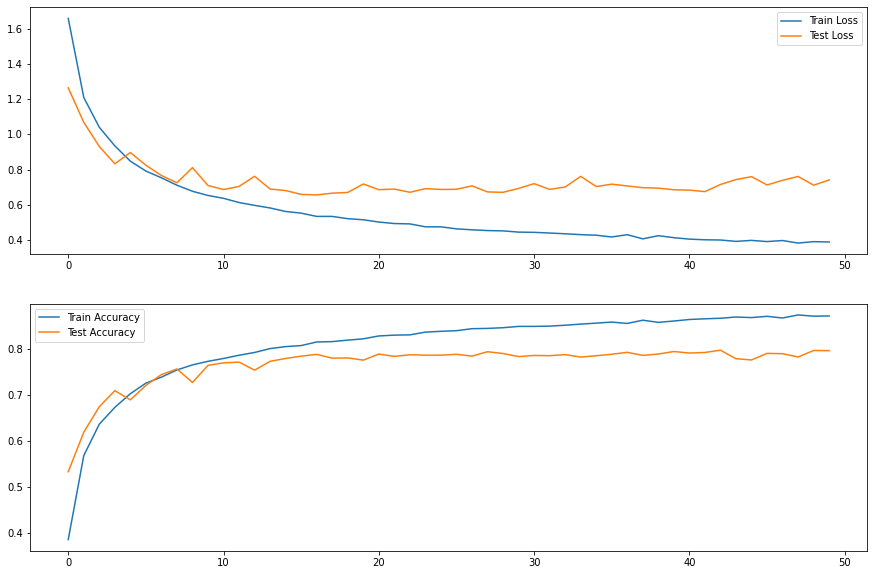

In [ ]:
fig,ax=plt.subplots(2,figsize=(15,10))
ax[0].plot(history.history['loss'],label='Train Loss')
ax[0].plot(history.history['val_loss'],label='Test Loss')
ax[0].legend()
ax[1].plot(history.history['accuracy'],label='Train Accuracy')
ax[1].plot(history.history['val_accuracy'],label='Test Accuracy')
ax[1].legend()

# Evaluating the model on test dataset

313/313 [==============================] - 3s 8ms/step - loss: 0.7410 - accuracy: 0.7960


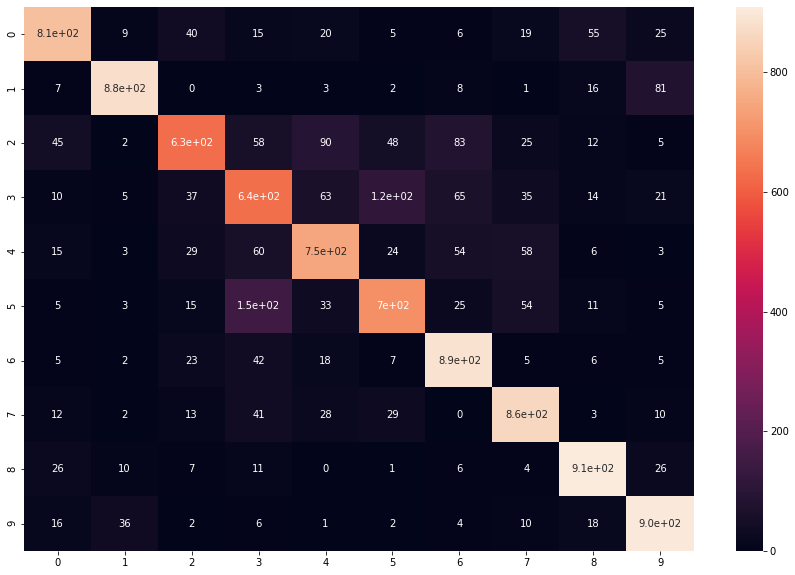

In [ ]:
evaluation = model.evaluate(x=X_test_norm,y=y_test_ohe,batch_size=32)
y_test_pred = model.predict(X_test_norm)
y_test_pred = np.argmax(y_test_pred,axis=1)
cm = confusion_matrix(y_test,y_test_pred)
plt.figure(figsize=(15,10))
sns.heatmap(cm,annot=True)

# Adding a dropout layer with dropout of 0.3 and trained on train dataset

In [ ]:
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),padding="same",activation='relu',kernel_initializer='glorot_normal',input_shape=(32,32,3)))
model.add(Conv2D(filters=32,kernel_size=(3,3),padding="same",activation='relu',kernel_initializer='glorot_normal'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add((Dropout(0.3)))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same",activation='relu',kernel_initializer='glorot_normal'))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same",activation='relu',kernel_initializer='glorot_normal'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add((Dropout(0.3)))
model.add(Conv2D(filters=128,kernel_size=(3,3),padding="same",activation='relu',kernel_initializer='glorot_normal'))
model.add(Conv2D(filters=128,kernel_size=(3,3),padding="same",activation='relu',kernel_initializer='glorot_normal'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add((Dropout(0.3)))
model.add(Flatten())
model.add(Dense(units=512,activation='relu',kernel_initializer='glorot_normal'))
model.add((Dropout(0.3)))
model.add(Dense(units=128,activation='relu',kernel_initializer='glorot_normal'))
model.add((Dropout(0.3)))
model.add(Dense(units=10,activation='softmax'))
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(x=X_train_norm,y=y_train_ohe,batch_size=32,epochs=50,validation_data=(X_test_norm,y_test_ohe))

Epoch 1/50
1563/1563 [==============================] - 32s 20ms/step - loss: 1.7246 - accuracy: 0.3539 - val_loss: 1.3576 - val_accuracy: 0.4962
Epoch 2/50
1563/1563 [==============================] - 31s 20ms/step - loss: 1.3408 - accuracy: 0.5149 - val_loss: 1.1511 - val_accuracy: 0.5782
Epoch 3/50
1563/1563 [==============================] - 32s 21ms/step - loss: 1.1878 - accuracy: 0.5793 - val_loss: 1.0459 - val_accuracy: 0.6272
Epoch 4/50
1563/1563 [==============================] - 31s 20ms/step - loss: 1.0912 - accuracy: 0.6145 - val_loss: 0.9452 - val_accuracy: 0.6670
Epoch 5/50
1563/1563 [==============================] - 29s 19ms/step - loss: 1.0216 - accuracy: 0.6405 - val_loss: 0.9265 - val_accuracy: 0.6691
Epoch 6/50
1563/1563 [==============================] - 30s 19ms/step - loss: 0.9723 - accuracy: 0.6621 - val_loss: 0.8652 - val_accuracy: 0.6973
Epoch 7/50
1563/1563 [==============================] - 30s 19ms/step - loss: 0.9290 - accuracy: 0.6761 - val_loss: 0.8168 -

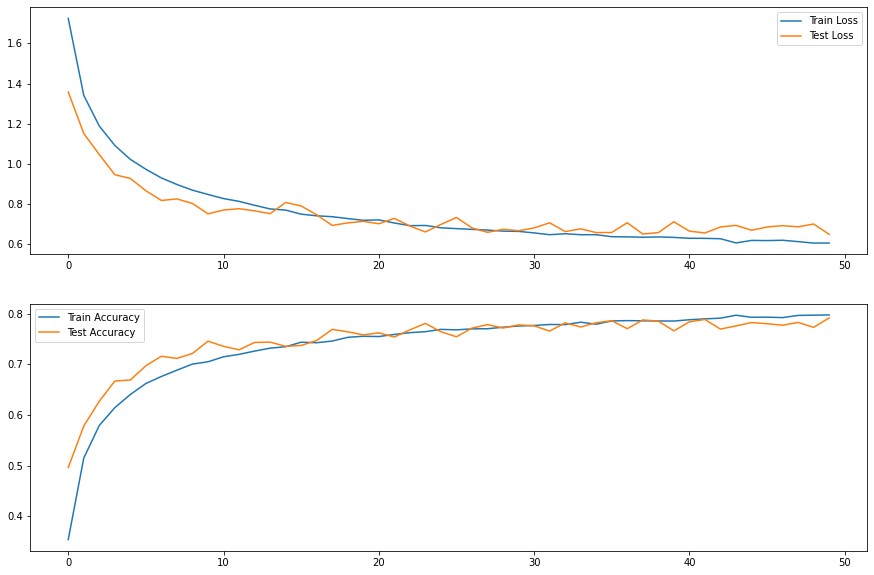

In [ ]:
fig,ax=plt.subplots(2,figsize=(15,10))
ax[0].plot(history.history['loss'],label='Train Loss')
ax[0].plot(history.history['val_loss'],label='Test Loss')
ax[0].legend()
ax[1].plot(history.history['accuracy'],label='Train Accuracy')
ax[1].plot(history.history['val_accuracy'],label='Test Accuracy')
ax[1].legend()

313/313 [==============================] - 3s 8ms/step - loss: 0.6479 - accuracy: 0.7917


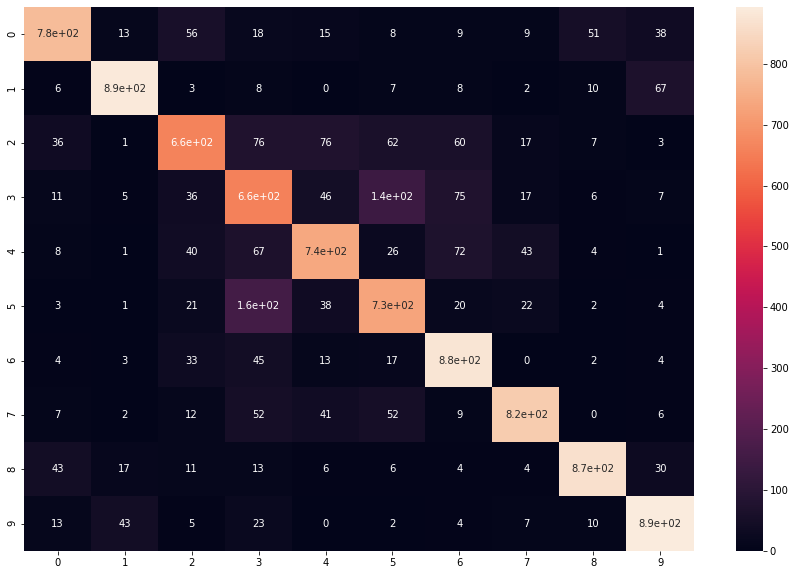

In [ ]:
evaluation = model.evaluate(x=X_test_norm,y=y_test_ohe,batch_size=32)
y_test_pred = model.predict(X_test_norm)
y_test_pred = np.argmax(y_test_pred,axis=1)
cm = confusion_matrix(y_test,y_test_pred)
plt.figure(figsize=(15,10))
sns.heatmap(cm,annot=True)

# Adding a dropout layer with dropout of 0.4 and trained on train dataset

In [ ]:
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),padding="same",activation='relu',kernel_initializer='glorot_normal',input_shape=(32,32,3)))
model.add(Conv2D(filters=32,kernel_size=(3,3),padding="same",activation='relu',kernel_initializer='glorot_normal'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add((Dropout(0.4)))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same",activation='relu',kernel_initializer='glorot_normal'))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same",activation='relu',kernel_initializer='glorot_normal'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add((Dropout(0.4)))
model.add(Conv2D(filters=128,kernel_size=(3,3),padding="same",activation='relu',kernel_initializer='glorot_normal'))
model.add(Conv2D(filters=128,kernel_size=(3,3),padding="same",activation='relu',kernel_initializer='glorot_normal'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add((Dropout(0.4)))
model.add(Flatten())
model.add(Dense(units=512,activation='relu',kernel_initializer='glorot_normal'))
model.add((Dropout(0.4)))
model.add(Dense(units=128,activation='relu',kernel_initializer='glorot_normal'))
model.add((Dropout(0.4)))
model.add(Dense(units=10,activation='softmax'))
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(x=X_train_norm,y=y_train_ohe,batch_size=32,epochs=50,validation_data=(X_test_norm,y_test_ohe))

Epoch 1/50
1563/1563 [==============================] - 33s 21ms/step - loss: 1.7442 - accuracy: 0.3484 - val_loss: 1.3708 - val_accuracy: 0.5041
Epoch 2/50
1563/1563 [==============================] - 32s 20ms/step - loss: 1.3820 - accuracy: 0.4986 - val_loss: 1.2878 - val_accuracy: 0.5387
Epoch 3/50
1563/1563 [==============================] - 33s 21ms/step - loss: 1.2433 - accuracy: 0.5547 - val_loss: 1.0934 - val_accuracy: 0.6107
Epoch 4/50
1563/1563 [==============================] - 32s 20ms/step - loss: 1.1650 - accuracy: 0.5903 - val_loss: 1.0378 - val_accuracy: 0.6373
Epoch 5/50
1563/1563 [==============================] - 30s 19ms/step - loss: 1.1140 - accuracy: 0.6056 - val_loss: 1.0077 - val_accuracy: 0.6401
Epoch 6/50
1563/1563 [==============================] - 30s 19ms/step - loss: 1.0688 - accuracy: 0.6257 - val_loss: 0.9511 - val_accuracy: 0.6668
Epoch 7/50
1563/1563 [==============================] - 30s 19ms/step - loss: 1.0344 - accuracy: 0.6401 - val_loss: 0.9542 -

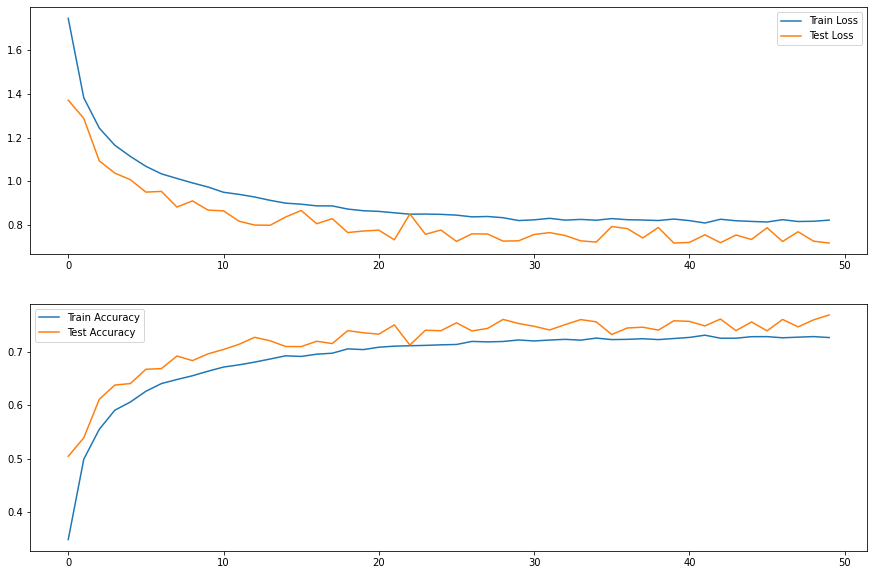

In [ ]:
fig,ax=plt.subplots(2,figsize=(15,10))
ax[0].plot(history.history['loss'],label='Train Loss')
ax[0].plot(history.history['val_loss'],label='Test Loss')
ax[0].legend()
ax[1].plot(history.history['accuracy'],label='Train Accuracy')
ax[1].plot(history.history['val_accuracy'],label='Test Accuracy')
ax[1].legend()

313/313 [==============================] - 2s 7ms/step - loss: 0.7183 - accuracy: 0.7684


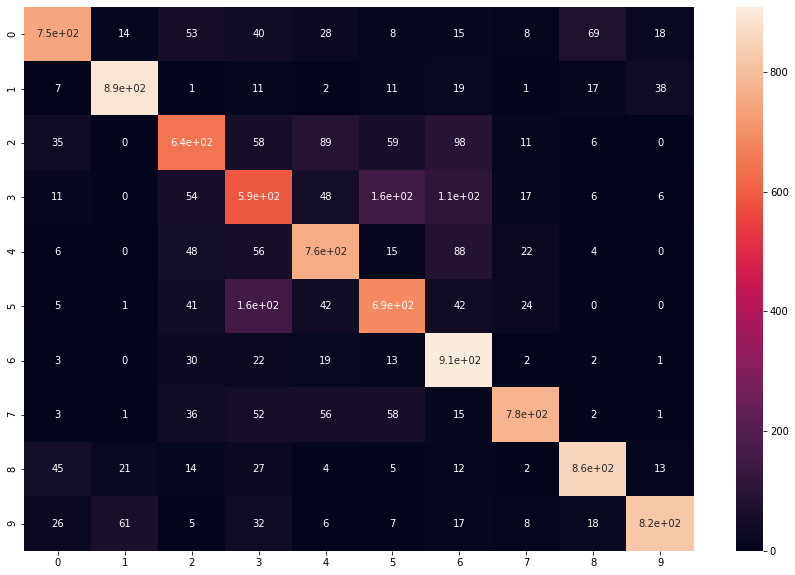

In [ ]:
evaluation = model.evaluate(x=X_test_norm,y=y_test_ohe,batch_size=32)
y_test_pred = model.predict(X_test_norm)
y_test_pred = np.argmax(y_test_pred,axis=1)
cm = confusion_matrix(y_test,y_test_pred)
plt.figure(figsize=(15,10))
sns.heatmap(cm,annot=True)

Obtained better performance with dropout layer of dropout 0.3. So, used the same dropout value in further analysis

# Adding batch Normalization layer and trained on train dataset

In [14]:
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),padding="same",activation='relu',kernel_initializer='glorot_normal',input_shape=(32,32,3)))
model.add(BatchNormalization())
model.add(Conv2D(filters=32,kernel_size=(3,3),padding="same",activation='relu',kernel_initializer='glorot_normal'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add((Dropout(0.3)))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same",activation='relu',kernel_initializer='glorot_normal'))
model.add(BatchNormalization())
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same",activation='relu',kernel_initializer='glorot_normal'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add((Dropout(0.3)))
model.add(Conv2D(filters=128,kernel_size=(3,3),padding="same",activation='relu',kernel_initializer='glorot_normal'))
model.add(BatchNormalization())
model.add(Conv2D(filters=128,kernel_size=(3,3),padding="same",activation='relu',kernel_initializer='glorot_normal'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add((Dropout(0.3)))
model.add(Flatten())
model.add(Dense(units=512,activation='relu',kernel_initializer='glorot_normal'))
model.add((Dropout(0.3)))
model.add(Dense(units=128,activation='relu',kernel_initializer='glorot_normal'))
model.add((Dropout(0.3)))
model.add(Dense(units=10,activation='softmax'))
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(x=X_train_norm,y=y_train_ohe,batch_size=32,epochs=50,validation_data=(X_test_norm,y_test_ohe))

Epoch 1/50
1563/1563 [==============================] - 59s 20ms/step - loss: 1.6358 - accuracy: 0.4059 - val_loss: 1.2747 - val_accuracy: 0.5531
Epoch 2/50
1563/1563 [==============================] - 29s 18ms/step - loss: 1.1386 - accuracy: 0.6039 - val_loss: 1.4602 - val_accuracy: 0.5287
Epoch 3/50
1563/1563 [==============================] - 29s 19ms/step - loss: 0.9528 - accuracy: 0.6776 - val_loss: 0.7797 - val_accuracy: 0.7307
Epoch 4/50
1563/1563 [==============================] - 29s 19ms/step - loss: 0.8483 - accuracy: 0.7148 - val_loss: 0.7911 - val_accuracy: 0.7181
Epoch 5/50
1563/1563 [==============================] - 30s 19ms/step - loss: 0.7654 - accuracy: 0.7437 - val_loss: 0.6707 - val_accuracy: 0.7697
Epoch 6/50
1563/1563 [==============================] - 29s 19ms/step - loss: 0.7156 - accuracy: 0.7614 - val_loss: 0.6364 - val_accuracy: 0.7840
Epoch 7/50
1563/1563 [==============================] - 29s 19ms/step - loss: 0.6561 - accuracy: 0.7792 - val_loss: 0.6863 -

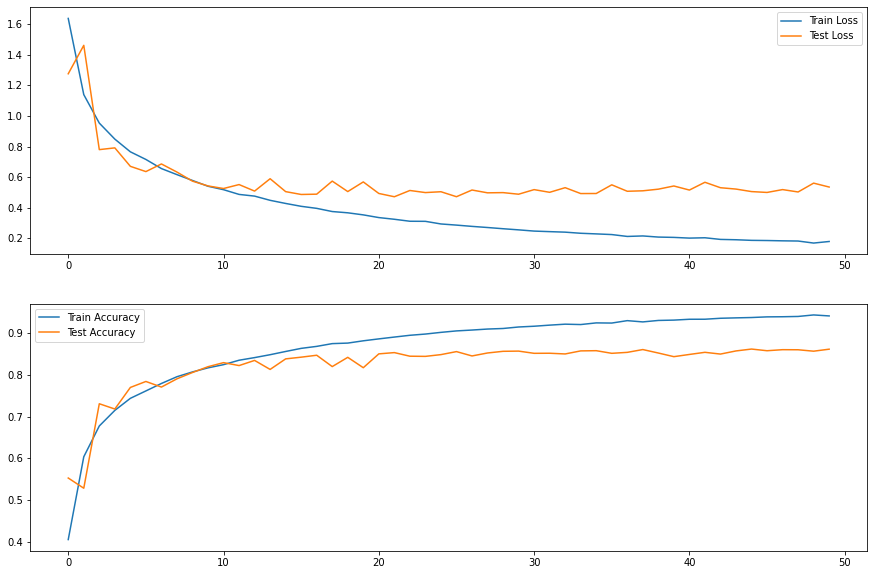

In [15]:
fig,ax=plt.subplots(2,figsize=(15,10))
ax[0].plot(history.history['loss'],label='Train Loss')
ax[0].plot(history.history['val_loss'],label='Test Loss')
ax[0].legend()
ax[1].plot(history.history['accuracy'],label='Train Accuracy')
ax[1].plot(history.history['val_accuracy'],label='Test Accuracy')
ax[1].legend()

313/313 [==============================] - 3s 8ms/step - loss: 0.5355 - accuracy: 0.8612


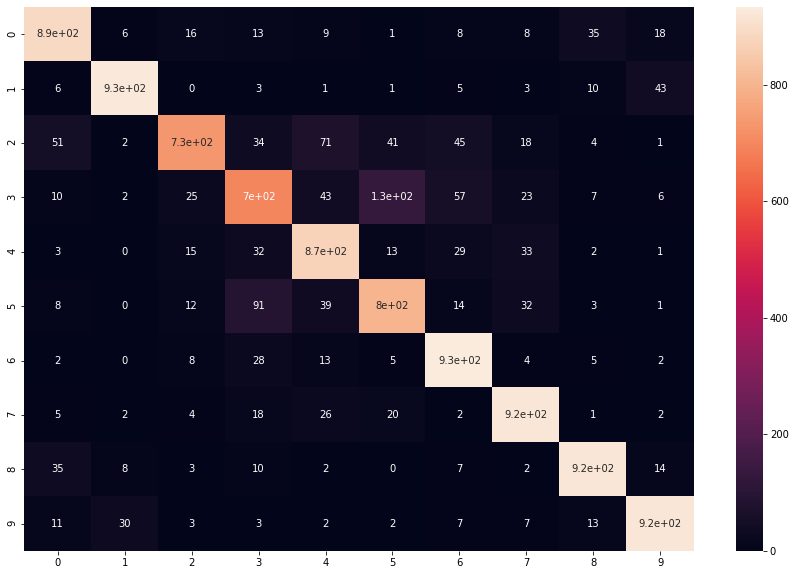

In [16]:
evaluation = model.evaluate(x=X_test_norm,y=y_test_ohe,batch_size=32)
y_test_pred = model.predict(X_test_norm)
y_test_pred = np.argmax(y_test_pred,axis=1)
cm = confusion_matrix(y_test,y_test_pred)
plt.figure(figsize=(15,10))
sns.heatmap(cm,annot=True)

Adding batch normalization improved the accuracy of the model from 79.17% to 86.12%

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data augmentation on train data and training the model on generated data along with train data

In [18]:
datagen = ImageDataGenerator(height_shift_range=0.2,horizontal_flip=True)
it_train = datagen.flow(X_train_norm, y_train_ohe, batch_size=32)
history = model.fit(it_train, epochs=50, validation_data=(X_test_norm, y_test_ohe))

Epoch 1/50
1563/1563 [==============================] - 53s 33ms/step - loss: 0.6346 - accuracy: 0.7944 - val_loss: 0.4511 - val_accuracy: 0.8496
Epoch 2/50
1563/1563 [==============================] - 53s 34ms/step - loss: 0.5671 - accuracy: 0.8152 - val_loss: 0.4284 - val_accuracy: 0.8588
Epoch 3/50
1563/1563 [==============================] - 52s 34ms/step - loss: 0.5433 - accuracy: 0.8213 - val_loss: 0.4448 - val_accuracy: 0.8534
Epoch 4/50
1563/1563 [==============================] - 53s 34ms/step - loss: 0.5265 - accuracy: 0.8254 - val_loss: 0.4529 - val_accuracy: 0.8558
Epoch 5/50
1563/1563 [==============================] - 53s 34ms/step - loss: 0.5115 - accuracy: 0.8311 - val_loss: 0.4277 - val_accuracy: 0.8597
Epoch 6/50
1563/1563 [==============================] - 53s 34ms/step - loss: 0.5023 - accuracy: 0.8337 - val_loss: 0.4489 - val_accuracy: 0.8537
Epoch 7/50
1563/1563 [==============================] - 52s 33ms/step - loss: 0.4907 - accuracy: 0.8369 - val_loss: 0.4206 -

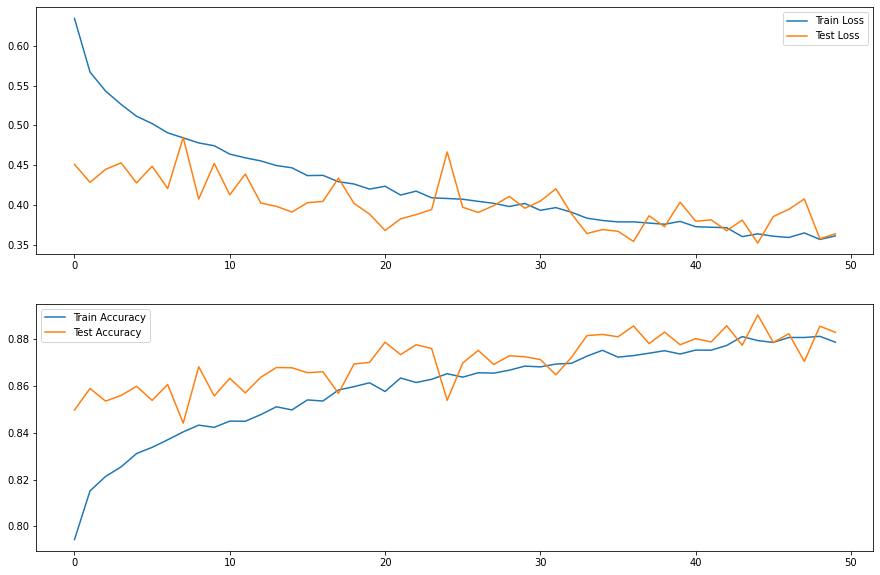

In [19]:
fig,ax=plt.subplots(2,figsize=(15,10))
ax[0].plot(history.history['loss'],label='Train Loss')
ax[0].plot(history.history['val_loss'],label='Test Loss')
ax[0].legend()
ax[1].plot(history.history['accuracy'],label='Train Accuracy')
ax[1].plot(history.history['val_accuracy'],label='Test Accuracy')
ax[1].legend()

313/313 [==============================] - 2s 8ms/step - loss: 0.3638 - accuracy: 0.8827


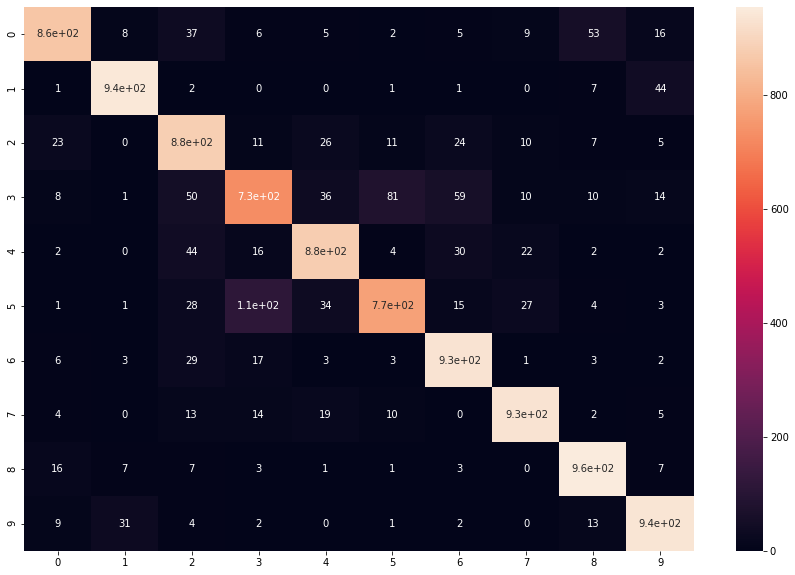

In [20]:
evaluation = model.evaluate(x=X_test_norm,y=y_test_ohe,batch_size=32)
y_test_pred = model.predict(X_test_norm)
y_test_pred = np.argmax(y_test_pred,axis=1)
cm = confusion_matrix(y_test,y_test_pred)
plt.figure(figsize=(15,10))
sns.heatmap(cm,annot=True)

With data augmentation, the performance of the model improved from 86.12% to 88.27%